In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## XOR problem

In [2]:
# XOR function data
x = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = np.array([[0.0], [1.0], [1.0], [0.0]])

x = tf.cast(x, tf.float32)
y = tf.cast(y, tf.float32)

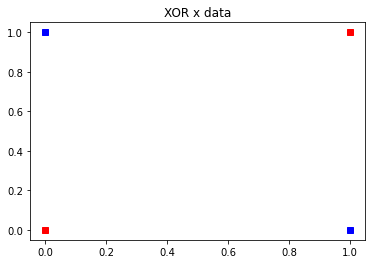

In [3]:
# Visualising the data
def plot_xor(x):
    plt.plot([x[0, 0], x[3, 0]], [x[0, 1], x[3, 1]], 'rs')
    plt.plot([x[1, 0], x[2, 0]], [x[1, 1], x[2, 1]], 'bs')
    plt.title('XOR x data')
    plt.show()
    
plot_xor(x)

## depth-2 NN

### Build the model

Build a tf.keras.Sequential model => Sequential groups a linear stack of layers into a tf.keras.Model.
Have a look at https://www.tensorflow.org/guide/keras/sequential_model
and https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

Also check how layers.Dense is built
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

And also check about ReLU activation function
https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

In [4]:
xor_network = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu',use_bias=False, kernel_initializer=tf.random_normal_initializer(seed=100, stddev=0.1), dtype='float32'),
    tf.keras.layers.Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(seed=100, stddev=0.1), dtype='float32'),
])

Note the restriction applied to initialization - if y_hat is too much, then the log in loss will go to infinity. We need y_hat between -1 and 1, and then use sigmoid to make it in [0,1].

### Implement the loss

Cross-entropy is a measure building upon entropy and generally calculating the difference between 
two probability distributions. It is widely used as a loss function when optimizing classification models.
Extracted from https://machinelearningmastery.com/cross-entropy-for-machine-learning/

In [5]:
# Function inputs: y (expected), y_hat (predicted)
def cross_entropy(y, y_hat):
    loss = 0
    m = y.shape[0]
    
    for i in range(m):
        if y[i] == 1.0:
            loss += -tf.math.log(y_hat[i])  # probability for class 1 (given directly by the model)
        else:
            loss += -tf.math.log(1.0 - y_hat[i]) # probability for class 0
            
    m = tf.cast(m, tf.float32)
    return loss / m

### Select an optimizer

The Gradient descent algorithm is more precise than simple step functions.

Look at https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

In [6]:
optimiser = tf.optimizers.SGD(learning_rate=1e-1)

## Training NN

Further reference on tf.GradientTape

https://www.tensorflow.org/api_docs/python/tf/GradientTape

https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22

In [7]:
# Running the model for 100 epochs
epochs = 100
loss_list = []

for iter in range(epochs):
    with tf.GradientTape() as tape: 
        y_hat = xor_network(x, training=True)
        y_predict = tf.nn.sigmoid(y_hat)
        loss = cross_entropy(y, y_predict) 
        
    grads = tape.gradient(loss, xor_network.trainable_variables) 
    optimiser.apply_gradients(zip(grads, xor_network.trainable_variables)) 
    loss_list.append(loss)
    
    print("Epoch => %d loss: %.2f" %(iter, loss))

Epoch => 0 loss: 0.69
Epoch => 1 loss: 0.69
Epoch => 2 loss: 0.69
Epoch => 3 loss: 0.69
Epoch => 4 loss: 0.69
Epoch => 5 loss: 0.69
Epoch => 6 loss: 0.69
Epoch => 7 loss: 0.69
Epoch => 8 loss: 0.69
Epoch => 9 loss: 0.69
Epoch => 10 loss: 0.69
Epoch => 11 loss: 0.69
Epoch => 12 loss: 0.69
Epoch => 13 loss: 0.69
Epoch => 14 loss: 0.69
Epoch => 15 loss: 0.69
Epoch => 16 loss: 0.69
Epoch => 17 loss: 0.69
Epoch => 18 loss: 0.69
Epoch => 19 loss: 0.69
Epoch => 20 loss: 0.69
Epoch => 21 loss: 0.69
Epoch => 22 loss: 0.69
Epoch => 23 loss: 0.69
Epoch => 24 loss: 0.69
Epoch => 25 loss: 0.69
Epoch => 26 loss: 0.69
Epoch => 27 loss: 0.69
Epoch => 28 loss: 0.69
Epoch => 29 loss: 0.69
Epoch => 30 loss: 0.69
Epoch => 31 loss: 0.69
Epoch => 32 loss: 0.69
Epoch => 33 loss: 0.69
Epoch => 34 loss: 0.69
Epoch => 35 loss: 0.69
Epoch => 36 loss: 0.69
Epoch => 37 loss: 0.69
Epoch => 38 loss: 0.69
Epoch => 39 loss: 0.69
Epoch => 40 loss: 0.69
Epoch => 41 loss: 0.69
Epoch => 42 loss: 0.69
Epoch => 43 loss: 0.6

Text(0.5, 1.0, 'Loss')

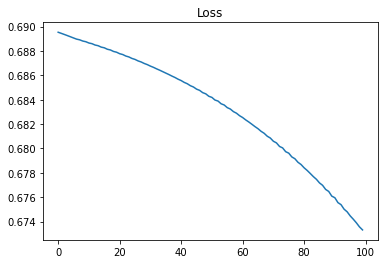

In [8]:
plt.plot(loss_list)
plt.title('Loss')